In [65]:
#importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np 

from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import gradient_boosting,RandomForestClassifier

from sklearn.metrics import accuracy_score

In [64]:
diabetes = load_digits()
features = diabetes.data
feature_names = diabetes.feature_names
target = diabetes.target

In [41]:
df = pd.concat([pd.DataFrame(features),pd.DataFrame(target)],axis = 1)
df.columns = feature_names + ['Target']

In [42]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [43]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [44]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [45]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: Target, Length: 1797, dtype: int64

In [47]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
print("X_train: {} and y_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {} and y_train: {}".format(X_test.shape, y_test.shape))

X_train: (1437, 64) and y_train: (1437,)
X_test: (360, 64) and y_train: (360,)


### SVM

In [53]:
grid_params = {'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50],
              'kernel': ['rbf','linear','poly']}
gs = GridSearchCV(svm.SVC(),grid_params,verbose =1 )
results = gs.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    8.2s finished


In [54]:
results.best_params_

{'C': 10, 'kernel': 'rbf'}

In [55]:
y_pred = gs.predict(X_test)

In [60]:
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy using SVM at parameters: {} is {} ".format(gs.best_params_,accuracy*100))

Accuracy using SVM at parameters: {'C': 10, 'kernel': 'rbf'} is 98.61111111111111 


### Decision Tree 
### RandomForest Classifier

In [66]:
Grid_params_dt = {'max_depth':[3,5,10,None],
                 'criterion': ['gini','entropy'] }
gs_dt = GridSearchCV( DecisionTreeClassifier(), Grid_params_dt, verbose =1 )

results_dt = gs_dt.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished


In [67]:
results_dt.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [68]:
y_pred = gs_dt.predict(X_test)
print("Accuracy with decision Tree at {} is {}".format(results_dt.best_params_,accuracy_score(y_pred,y_test)*100))

Accuracy with decision Tree at {'criterion': 'entropy', 'max_depth': None} is 88.88888888888889


#### Random Forest

In [71]:
#MEAN ACCURACY AT DIFFERENT DEPTHS AND NO OF TREES
number_of_trees=[5, 10, 50, 150, 200]
max_depth=[3,5,10,None]
mean_accuracy=[]
depth_list=[]
trees_list=[]
for no_trees in number_of_trees:
    for depth in max_depth:
        clfier_1=RandomForestClassifier(max_depth=depth,n_estimators=no_trees, random_state=42)
        scores=cross_val_score(clfier_1, X_train, np.ravel(y_train),cv=10)
        print("Mean Accuracy: ", scores.mean(),"at depth= ",depth,"and when no of trees= ",no_trees)
        mean_accuracy.append(scores.mean())
        depth_list.append(depth)
        trees_list.append(no_trees)

Mean Accuracy:  0.7557449494949495 at depth=  3 and when no of trees=  5
Mean Accuracy:  0.8559489121989122 at depth=  5 and when no of trees=  5
Mean Accuracy:  0.9053661616161616 at depth=  10 and when no of trees=  5
Mean Accuracy:  0.9074397824397826 at depth=  None and when no of trees=  5
Mean Accuracy:  0.8190413752913752 at depth=  3 and when no of trees=  10
Mean Accuracy:  0.8935168997668997 at depth=  5 and when no of trees=  10
Mean Accuracy:  0.9498883061383061 at depth=  10 and when no of trees=  10
Mean Accuracy:  0.9450320512820513 at depth=  None and when no of trees=  10
Mean Accuracy:  0.8782294094794094 at depth=  3 and when no of trees=  50
Mean Accuracy:  0.9366792929292929 at depth=  5 and when no of trees=  50
Mean Accuracy:  0.9728778166278165 at depth=  10 and when no of trees=  50
Mean Accuracy:  0.9742618492618493 at depth=  None and when no of trees=  50
Mean Accuracy:  0.8795988733488734 at depth=  3 and when no of trees=  150
Mean Accuracy:  0.94293900543

In [77]:
#CONVERTING THE OUTPUT INTO DATAFRAME 
heat_df=pd.DataFrame(data=list(zip(trees_list,depth_list,mean_accuracy)),columns=['number_of_trees','max_depth','mean_accuracy'])
print(heat_df)

    number_of_trees  max_depth  mean_accuracy
0                 5        3.0       0.755745
1                 5        5.0       0.855949
2                 5       10.0       0.905366
3                 5        NaN       0.907440
4                10        3.0       0.819041
5                10        5.0       0.893517
6                10       10.0       0.949888
7                10        NaN       0.945032
8                50        3.0       0.878229
9                50        5.0       0.936679
10               50       10.0       0.972878
11               50        NaN       0.974262
12              150        3.0       0.879599
13              150        5.0       0.942939
14              150       10.0       0.974942
15              150        NaN       0.977049
16              200        3.0       0.879579
17              200        5.0       0.944333
18              200       10.0       0.973553
19              200        NaN       0.978438


In [78]:
best_accuracy=max(mean_accuracy)    
best_depth_with_highest_accuracy=depth_list[mean_accuracy.index(best_accuracy)]
best_no_of_trees=trees_list[mean_accuracy.index(best_accuracy)]

print("Best depth and no of trees with highest accuracy at accuracy=: ",best_accuracy,"is at depth=: ",best_depth_with_highest_accuracy,"and no of trees=:",best_no_of_trees)

Best depth and no of trees with highest accuracy at accuracy=:  0.9784382284382286 is at depth=:  None and no of trees=: 200


number_of_trees       5         10        50        150       200
max_depth                                                        
NaN              0.907440  0.945032  0.974262  0.977049  0.978438
3.0              0.755745  0.819041  0.878229  0.879599  0.879579
5.0              0.855949  0.893517  0.936679  0.942939  0.944333
10.0             0.905366  0.949888  0.972878  0.974942  0.973553


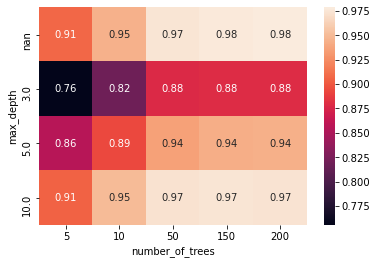

In [79]:
heat_df=heat_df.pivot(index='max_depth',columns='number_of_trees',values='mean_accuracy')
print(heat_df)
sns.heatmap(data=heat_df, annot=True)